Use ROM based on greedy algorithm to solve the following parametric problem on 
${\Omega} = (0, 1) \times (0, 1)$

$$
\begin{cases}
\nabla \cdot ({\mu_1} \nabla u) + \boldsymbol{\beta}\cdot \nabla{u}= 0 & \text{in } \Omega,\\
{\mu_1} \nabla u \cdot \mathbf{n} = \mu_2 & \text{in } \Gamma_{b},\\
u = 0 & \text{in } \Gamma_{tl},\\
 \nabla u \cdot \mathbf{n} = 0 & \text{otherwise},
\end{cases}
$$

where $\mathbf{n}$ is the outer-normal to the portion of $\partial \Omega$ we consider. 
Specifically, $\Gamma_b = [0, 1] \times \{0\}$ and $\Gamma_{tl} = ([0, 1] \times \{1\}) \cup (\{0\} \times [0,1])$.

The convection field is $\boldsymbol{\beta} = [y(1-y),0]^T$ and $(x,y)$ represent a spatial coordinate in $\Omega$.
The parametric space is $\mathcal P = [0.1, 10] \times [-1,1]$.
Be careful in evaluating the coercivity constant for the greedy procedure.
For Advection-Diffusion problems the coercivity constant with respect the $H^1_0(\Omega)$ _norm_ can be approximated by
$$
\frac{\mu_1}{1 + C_{\Omega}^2},
$$
where $C_{\Omega}$ is the Poincaré constant, i.e. the constant verifying
$$\lvert \lvert u \rvert \rvert_{L^2(\Omega)} \leq C_{\Omega} \lvert \lvert \nabla u \rvert \rvert_{L^2(\Omega)}.$$

The Poincaré constant can be approximated by the following eigenvalue problem: $ \mathbb X_{H^1_{\text{semi-norm}}} \mathbf x = \lambda \mathbb X_{L^2_{\text{norm}}}\mathbf x$.

Coding-wise, you can use `scipy` as follows on the inner product and reaction matrix to find $C_{\Omega}$:

In [1]:
%reset -f

In [2]:
!git clone https://github.com/fvicini/CppToPython.git
%cd CppToPython

Cloning into 'CppToPython'...
remote: Enumerating objects: 645, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 645 (delta 31), reused 50 (delta 17), pack-reused 487
Receiving objects: 100% (645/645), 596.41 KiB | 2.65 MiB/s, done.
Resolving deltas: 100% (424/424), done.
/content/CppToPython


In [3]:
!git submodule init
!git submodule update

Submodule 'gedim' (https://github.com/fvicini/gedim.git) registered for path 'gedim'
Cloning into '/content/CppToPython/gedim'...
Submodule path 'gedim': checked out 'c52847f1a527d36b529f39d3744afe9fd612b62c'


In [4]:
!mkdir -p externals
%cd externals
!cmake -DINSTALL_VTK=OFF -DINSTALL_LAPACK=OFF ../gedim/3rd_party_libraries
!make -j4
%cd ..

/content/CppToPython/externals
-- The CXX compiler identification is GNU 9.4.0
-- The C compiler identification is GNU 9.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Install Eigen3 release 3.4.0
-- Install GoogleTest release 1.11.0
-- Install triangle release 1.0.4
-- Install tetgen release 1.0.0
-- Configuring done
-- Generating done
-- Build files have been written to: /content/CppToPython/externals
[  3%] Creating directories for 'Eigen'
[  6%] Creating directories for 'googletest'
[  9%] Creating directories for 'triangle'
[ 12%] Performing download step (git clone) for 'Eigen'
[ 15%] Creating directories for 'tetgen'

In [5]:
!mkdir -p release
%cd release
!cmake -DCMAKE_PREFIX_PATH="/content/CppToPython/externals/Main_Install/eigen3;/content/CppToPython/externals/Main_Install/triangle;/content/CppToPython/externals/Main_Install/tetgen;/content/CppToPython/externals/Main_Install/googletest" ../
!make -j4 GeDiM4Py
%cd ..

/content/CppToPython/release
-- The CXX compiler identification is GNU 9.4.0
-- The C compiler identification is GNU 9.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Gedim Build configuration: Release
-- Gedim Library will be installed in: /content/CppToPython/release/gedim/GeDiM/GeDiM
-- Looking for sgemm_
-- Looking for sgemm_ - not found
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD - Failed
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - found
-- Foun

In [6]:
import numpy as np
%cd CppToPython/
import GeDiM4Py as gedim
from scipy.sparse.linalg import splu
import time

[Errno 2] No such file or directory: 'CppToPython/'
/content/CppToPython


In [7]:
lib = gedim.ImportLibrary("./release/GeDiM4Py.so")

config = { 'GeometricTolerance': 1.0e-8 }
gedim.Initialize(config, lib)

In [8]:
def Poisson_a(numPoints, points):
	values = np.ones(numPoints)
	return values.ctypes.data

def Poisson_b(numPoints, points):
 matPoints = gedim.make_nd_matrix(points, (3, numPoints), np.double)
 values = np.zeros(numPoints)
 for p in range(0, numPoints):
		values[p] = (matPoints[1,p] * (1.0 - matPoints[1,p]))
		return values.ctypes.data

def Poisson_c(numPoints, points):
	values = np.ones(numPoints)
	return values.ctypes.data

def Poisson_strongTerm(numPoints, points):
	matPoints = gedim.make_nd_matrix(points, (3, numPoints), np.double)
	values = np.zeros(numPoints)
	return values.ctypes.data

def Poisson_weakTerm_sotto(numPoints, points):
	matPoints = gedim.make_nd_matrix(points, (3, numPoints), np.double)
	values = np.ones(numPoints)
	return values.ctypes.data

In [9]:
meshSize = 0.002
order = 2

In [10]:
domain = { 'SquareEdge': 1.0, 'VerticesBoundaryCondition': [1,0,1,1], 'EdgesBoundaryCondition': [3,2,1,1], 'DiscretizationType': 1, 'MeshCellsMaximumArea': meshSize }
[meshInfo, mesh] = gedim.CreateDomainSquare(domain, lib)

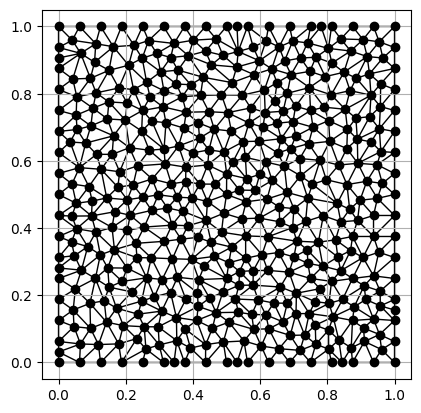

In [11]:
gedim.PlotMesh(mesh)

In [12]:
discreteSpace = { 'Order': order, 'Type': 1, 'BoundaryConditionsType': [1, 2, 3, 3] }
[problemData, dofs, strongs] = gedim.Discretize(discreteSpace, lib)

In [13]:
#Assemble linear system exploiting affinity
[stiffness, stiffnessStrong] = gedim.AssembleStiffnessMatrix(Poisson_a, problemData, lib)
[advection, advectionStrong] = gedim.AssembleAdvectionMatrix(Poisson_b, problemData, lib)
[reaction, reactionStrong] = gedim.AssembleReactionMatrix(Poisson_c, problemData, lib)
X = stiffness + reaction

weakTerm_sotto = gedim.AssembleWeakTerm(Poisson_weakTerm_sotto, 3, problemData, lib)

### define the problem
AQH = [stiffness,advection]  
fQH = [weakTerm_sotto]

def thetaA(mu):
    return [mu[0],1]
def thetaF(mu):
    return [mu[1]]

In [14]:
def normX(v, X):
	return np.sqrt(np.transpose(v) @ X @ v)

def ProjectSystem(AQH, fQH, B):
    AQN = []  #initialize
    fQN = []
    for AH in AQH:
        AQN.append(np.copy(np.transpose(B) @ AH @ B))
    for fH in fQH:
        fQN.append(np.copy(np.transpose(B) @ fH))
    return [AQN, fQN]

def Solve_full_order(AQH, fQH, thetaA_mu, thetaF_mu):
    A = thetaA_mu[0] * AQH[0]
    f = thetaF_mu[0] * fQH[0]
    for i in range(1, len(AQH)):
        A += thetaA_mu[i] * AQH[i]
    for i in range(1, len(fQH)):
        f += thetaF_mu[i] * fQH[i]
    return gedim.LUSolver(A, f, lib)

def Solve_reduced_order(AQN, fQN, thetaA_mu, thetaF_mu):
    A = thetaA_mu[0] * AQN[0]
    f = thetaF_mu[0] * fQN[0]
    for i in range(1, len(AQN)):
        A += thetaA_mu[i] * AQN[i]
    for i in range(1, len(fQN)):
        f += thetaF_mu[i] * fQN[i]
    return np.linalg.solve(A, f)   # small matrices, no need for LU

In [15]:
### define the training set
M = 100

mu1_range =[0.1, 10]
mu2_range =[-1, 1]

P = np.array([mu1_range, mu2_range])

training_set = np.random.uniform(low=P[:, 0], high=P[:, 1], size=(M, P.shape[0]))

In [16]:
# Coercivity constant
import scipy as sp
eigs, vecs = sp.linalg.eig(stiffness.todense(), reaction.todense())
min_eig = np.min(eigs.real)
C_omega = 1 / np.sqrt(min_eig)

def InfSupConstant(mu1):
  return mu1 /(1+C_omega**2)

In [17]:
def OfflineResidual(AQH, fQH, B, invX):
    Cq1q2 = []
    dq1q2 = []
    Eq1q2 = []

    for q1 in range(0, len(AQH)):
        Z = invX.solve(AQH[q1] @ B)

        aqh_list = []
        for q2 in range(0, len(AQH)):
            aqh_list.append(np.copy(np.transpose(Z) @ AQH[q2] @ B))
        Eq1q2.append(aqh_list.copy())

        fqh_list = []
        for q2 in range(0, len(fQH)):
            fqh_list.append(np.copy(np.transpose(Z) @ fQH[q2]))
        dq1q2.append(fqh_list.copy())

    for q1 in range(0, len(fQH)):
        t = invX.solve(fQH[q1])

        fqh_list = []
        for q2 in range(0, len(fQH)):
            fqh_list.append(np.copy(np.transpose(t) @ fQH[q2]))
        Cq1q2.append(fqh_list.copy())

    return [Cq1q2, dq1q2, Eq1q2]


def ErrorEstimate(Cq1q2, dq1q2, Eq1q2, thetaA_mu, thetaF_mu, solN, betaN_mu):
    fError = 0.0
    for q1 in range(0, len(Cq1q2)):
        for q2 in range(0, len(Cq1q2[q1])):
            fError += thetaF_mu[q1] * thetaF_mu[q2] * Cq1q2[q1][q2]
            

    uError = 0.0
    for q1 in range(0, len(Eq1q2)):
        for q2 in range(0, len(Eq1q2[q1])):
            uError += thetaA_mu[q1] * thetaA_mu[q2] * np.transpose(solN) @ Eq1q2[q1][q2] @ solN
            


    fuError = 0.0
    for q1 in range(0, len(dq1q2)):
        for q2 in range(0, len(dq1q2[q1])):
            fuError += thetaA_mu[q1] * thetaF_mu[q2] * np.transpose(solN) @ dq1q2[q1][q2]
            
    deltaN_squared = fError - 2.0 * fuError + uError
    
    if abs(deltaN_squared) <= 1.0e-12: # protect cancellation error
        deltaN_squared = 0.0
    elif deltaN_squared < 1.0e-12:
      raise Exception('deltaN_squared is negative')
      

    return np.sqrt(deltaN_squared) / betaN_mu 

In [18]:
# algorithm for orthonormalizing basis functions
def GramSchmidt(V, u, X):
    z = u
    if np.size(V) > 0:
        z = u - V @ (np.transpose(V) @ (X @ u))
    return z / normX(z, X)

##### Greedy #####
def Greedy(AQH, fQH, X, N_max, tol):
    N = 0
    basis_functions = []
    B = np.empty((0,0))
    deltaN = tol + 1.
    training_set_list = training_set.tolist()
    initial_muN = np.random.choice(len(training_set_list) - 1, 1)[0] # we randomly select one of the mu of the training set; initial_muN represents the index
    
    muN = training_set_list.pop(initial_muN) # mu selected randomly
    
    invX = splu(X) #using Lu decomposition because we don't know proprerties of X

    print('Perfom greedy algorithm...')
    while len(training_set_list) > 0 and N < N_max and deltaN > tol:
        N = N + 1
        print('\t', N,'/', N_max, '-', '{:.16e}'.format(np.mean(deltaN)), '/', '{:.16e}'.format(np.mean(tol))) # shows how many basic functions we have taken so far and the a-posteriori error compared to the threshold
        snapshot = Solve_full_order(AQH, fQH, thetaA(muN), thetaF(muN))
        basis_function = GramSchmidt(B, snapshot, X)
        basis_functions.append(np.copy(basis_function))
        B = np.transpose(np.array(basis_functions)) # matrix to go from high fidelity system to reduced one
        BX = np.transpose(B) @ X @ B

        [AQN, fQN] = ProjectSystem(AQH, fQH, B)
        [Cq1q2, dq1q2, Eq1q2] = OfflineResidual(AQH, fQH, B, invX)

        counter = 0
        mu_selected_index = -1
        max_deltaN = -1.
        for mu in training_set_list:
            solN_mu = Solve_reduced_order(AQN, fQN, thetaA(mu), thetaF(mu))
            

            betaN_mu = InfSupConstant(mu[0]) # N.B. mu[0], because it needs only mu_1

            deltaN_mu = ErrorEstimate(Cq1q2, dq1q2, Eq1q2, thetaA(mu), thetaF(mu), solN_mu, betaN_mu) / normX(solN_mu, BX)           

            if deltaN_mu > max_deltaN:
                max_deltaN = deltaN_mu
                mu_selected_index = counter

            counter = counter + 1

        if mu_selected_index == -1:
            raise Exception('ERROR, parameter not found')

        muN = training_set_list.pop(mu_selected_index)
        deltaN = max_deltaN

    return [N, np.transpose(np.array(basis_functions))]

In [19]:
### Compute Greedy
tol = 1.0e-7
N_max = 20
[N_Greedy, B_Greedy] = Greedy(AQH, fQH, X, N_max, tol)
print("N_Greedy", N_Greedy)

[AQN_Greedy, fQN_Greedy] = ProjectSystem(AQH, fQH, B_Greedy)

Perfom greedy algorithm...
	 1 / 20 - 1.0000001000000001e+00 / 9.9999999999999995e-08
	 2 / 20 - 3.0676756889793346e-02 / 9.9999999999999995e-08
	 3 / 20 - 1.7376864971173131e-04 / 9.9999999999999995e-08
N_Greedy 3


In [20]:
# a couple of parameters for a test

thetaA2 = 1
thetaf1 = 1

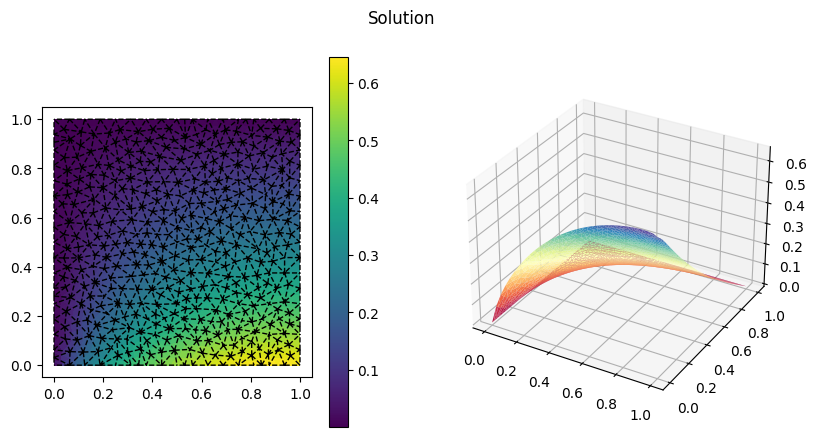

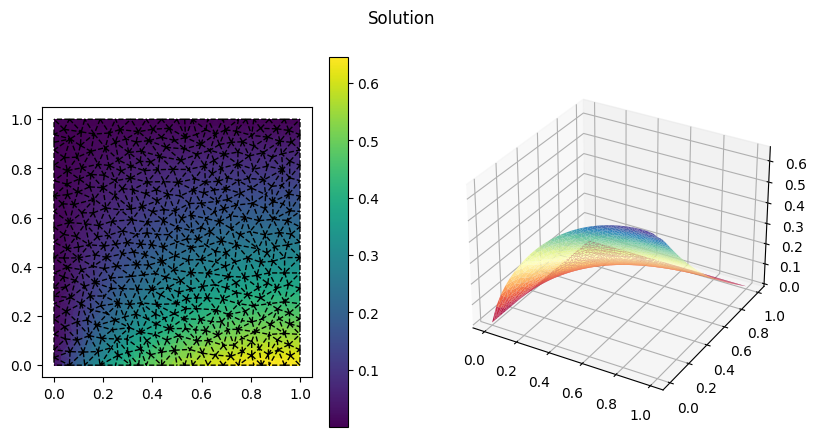

SingleParameter Gdy relative error =  3.5751914481706080e-07
SingleParameter Gdy absolute error =  2.6511895576152773e-07
SingleParameter Gdy L_inf error =  8.1798652185050003e-08


In [21]:
def TestSingleParameter(AQH, fQH, AQN, fQN, B, mu): # test using mu_1 = mu_2 = 1
    reduced_solution = Solve_reduced_order(AQN, fQN, thetaA(mu), thetaF(mu))
    full_solution = Solve_full_order(AQH, fQH, thetaA(mu), thetaF(mu))

    ###### plot #######
    proj_reduced_solution = B @ reduced_solution

    ### computing error
    error_function = full_solution - proj_reduced_solution
    error_norm_squared_component = np.transpose(error_function) @ X @ error_function
    abs_err = np.sqrt(abs(error_norm_squared_component))

    full_solution_norm_squared_component = np.transpose(full_solution) @  X @ full_solution
    rel_err = abs_err / np.sqrt(abs(full_solution_norm_squared_component))
    
    L_inf = np.max (np.abs(error_function))

    gedim.PlotSolution(mesh, dofs, strongs, proj_reduced_solution, np.zeros(problemData['NumberStrongs']))
    gedim.PlotSolution(mesh, dofs, strongs, full_solution, np.zeros(problemData['NumberStrongs']))

    return [rel_err, abs_err, L_inf]

[rel_err_Greedy, abs_err_Greedy, L_inf_Greedy] = TestSingleParameter(AQH, fQH, AQN_Greedy, fQN_Greedy, B_Greedy, [thetaA2, thetaf1])
print("SingleParameter Gdy relative error = ", '{:.16e}'.format(np.mean(rel_err_Greedy)) )
print("SingleParameter Gdy absolute error = ", '{:.16e}'.format(np.mean(abs_err_Greedy)) )
print("SingleParameter Gdy L_inf error = ", '{:.16e}'.format(L_inf_Greedy) )

In [22]:
def Avg_error(AQH, fQH, AQN, fQN, B):
    ### compute avg error
    abs_err = []
    rel_err = []
    L_inf = []
    seme = 1000
    np.random.seed(seme)
    testing_set = np.random.uniform(low=P[:, 0], high=P[:, 1], size=(100, P.shape[0]))
    speed_up = []

    print("Computing error and speedup analysis...")

    for mu in testing_set:
        ##### full #####
        start_fom = time.time()
        full_solution = Solve_full_order(AQH, fQH, thetaA(mu), thetaF(mu))
        time_fom = time.time() - start_fom

        #### reduced #####
        start_rom = time.time()
        reduced_solution = Solve_reduced_order(AQN, fQN, thetaA(mu), thetaF(mu))
        time_rom = time.time() - start_rom

        speed_up.append(time_fom / time_rom)

        proj_reduced_solution = B @ reduced_solution

        ### computing error
        error_function = full_solution - proj_reduced_solution
        error_norm_squared_component = np.transpose(error_function) @ X @ error_function
        absolute_error = np.sqrt(abs(error_norm_squared_component))
        abs_err.append(absolute_error)

        L_inf_err = np.max(np.abs(error_function)) # infinite norm error
        L_inf.append(L_inf_err)

        full_solution_norm_squared_component = np.transpose(full_solution) @  X @ full_solution
        relative_error = absolute_error/np.sqrt(abs(full_solution_norm_squared_component))
        rel_err.append(relative_error)

    return [rel_err, abs_err,L_inf, speed_up]

[rel_err_Greedy, abs_err_Greedy, L_inf_greedy, speed_up_Greedy] = Avg_error(AQH, fQH, AQN_Greedy, fQN_Greedy, B_Greedy)
print("- Average Gdy relative error = ", '{:.16e}'.format(np.mean(rel_err_Greedy)) )
print("- Average Gdy absolute error = ", '{:.16e}'.format(np.mean(abs_err_Greedy)) )
print("- Average Gdy L_inf norm error = ", '{:.16e}'.format(np.mean(L_inf_greedy)) )
print("- Average Gdy speed_up       = ", '{:.16e}'.format(np.mean(speed_up_Greedy)))

print("- Standard deviation Gdy relative error = ", '{:.16e}'.format(np.std(rel_err_Greedy)) )
print("- Standard deviation Gdy absolute error = ", '{:.16e}'.format(np.std(abs_err_Greedy)) )
print("- Standard deviation Gdy L_inf norm error = ", '{:.16e}'.format(np.std(L_inf_greedy)) )
print("- Standard deviation Gdy speed_up       = ", '{:.16e}'.format(np.std(speed_up_Greedy)))

Computing error and speedup analysis...
- Average Gdy relative error =  3.0763438826120621e-07
- Average Gdy absolute error =  5.3333616325672525e-08
- Average Gdy L_inf norm error =  1.6482119849312177e-08
- Average Gdy speed_up       =  1.0687849811852058e+02
- Standard deviation Gdy relative error =  1.2118187965851916e-07
- Standard deviation Gdy absolute error =  1.3514467801296959e-07
- Standard deviation Gdy L_inf norm error =  4.1930634330304901e-08
- Standard deviation Gdy speed_up       =  1.9129928403414965e+01
